Team Members:
    Yasmin Abdalla Farag Elsawy  34-2809
    Mariam Mostafa Mohamed 34-3704

In [79]:
import os
import numpy as np
import cv2 as cv
import math
from decimal import *
import scipy.stats as stats
import matplotlib.pyplot as plt

Traning the data and calculating the Mean and standard deviation and the variance

In [71]:
TrainImages = os.listdir("./Train")
TestImages = os.listdir("./Test")
classes = {}
char = "a"

while len(TrainImages) > 0:
    j = 0
    train7 = TrainImages[:7]
    images = []
    while j < 7:
        tempImage = cv.imread('./Train/' + train7[j],0)
        tempImage =tempImage/255
        images.append(tempImage.reshape(1,144)[0])  
        j += 1
    pixels = []
    x = 0
    pixelDict = {}
    while x < 144:
        pixel = []
        for image in images:
            pixel.append(image[x])
        mean = np.mean(pixel)
        var = np.var(pixel)
        std = np.std(pixel)
        dictTemp = { "mean" : mean, "var" : var, "std" : std }
        pixelDict.update({ x : dictTemp})
        x += 1
    classes.update({ char : pixelDict })
    char = chr(ord(char) + 1) 
    TrainImages = TrainImages[7:]
    


This function calculates the probability of a certain pixel given the mean and variance for a certain class pixel

In [72]:
def Probability(pixel, mean, var,sdv):        
    
    if var == 0:
        return 0.1

    num = pixel-mean
    numm = math.pow(num,2) * -1
    frac = (numm/(2*var))
    exponent = math.exp(frac)
    root = math.sqrt(2*math.pi* var) 
    prob= (1 / root ) * exponent
    if prob < 0.1:
        return 0.1
    
    
    return prob
    

This function computes the probabilities for all the classes for a specific image

In [73]:
def ProbabilitiesGuassian(classDict, pixelsVector):
    probabilities = {}
    
    for classValue, pixelsDict in classDict.items():
        probabilities[classValue] = 1
        for i in range(len(pixelsVector)):
            temp = pixelsDict[i]
            mean = temp["mean"]
            var = temp["var"]
            sdv = temp["std"]
            x = pixelsVector[i]
            tempo = Probability(x, mean, var,sdv)
            if np.isnan(probabilities[classValue]):
                return 0.1
            probabilities[classValue] = probabilities[classValue] *tempo
    return probabilities

Here we are creating a dictionary to hold the True positives for each class label  

In [74]:
TestDict={}
charsDict=set()
testSet = []
for img in TestImages:
    TempImage = cv.imread('./Test/' + img,0)
    TempImage = TempImage/255
    testSet.append(TempImage.reshape(1,144)[0])
    Label = img[2]
    if Label in charsDict:
            TestDict[Label]['Ground Turth'].append(img)
    else :
        charsDict.add(Label)
        TestDict[Label]={}
        TestDict[Label]['Ground Turth']=[img]
        TestDict[Label]['Prediction']=[]
        TestDict[Label]['count']=0
                

Training the data

In [75]:
for img in TestImages: 
    imgs = cv.imread('./Test/' + img,0)
    imgs = imgs/255
    imgs = imgs.reshape(1,144)[0]
    probs= ProbabilitiesGuassian(classes,imgs)
    labelj='NONE'
    privouspron=probs['a']
    for label,prob in probs.items():
        if prob>= privouspron:
            privouspron = prob
            labelj = label
    TestDict[labelj]['Prediction'].append(img)
    if img in TestDict[labelj]['Ground Turth']:
        TestDict[labelj]['count']+=1
            
        
    

In [76]:
Labels = []
countLabel=[]
for classValue, dictcionary in TestDict.items():
    Labels.append(classValue)
    countLabel.append(dictcionary['count'])

In [77]:
print(Labels)
print(countLabel)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


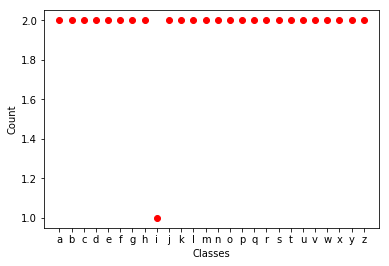

In [78]:
plt.plot(Labels, countLabel, 'ro')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.savefig('Accuracy.jpg')
plt.show()